<a href="https://colab.research.google.com/github/sanchitmisra/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Solution_Supervised_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**''Bike sharing clicks into a higher gear''**

##Bike rental businesses give customers—who are often, but not necessarily, tourists—bicycles for a short period. Bikes are generally rented for a few hours to recreationally explore the locality. But the customer base might also consist of college students on campus or others who rent for practical reasons.
##City bike rentals are particularly popular among tourists who like to explore their destination by bicycle. Usually, the customers of these businesses are most interested in an efficient, comfortable, and safe way of commuting from one place to another. Depending on the destination, weather conditions or the business can be seasonal. However, due to very seasonal industry it can be negatively affected by environmental forecasts and various other variables.

##Bike sharing is increasingly attracting more riders in cities around the world for its benefits regarding the urban environment and public health.One critical issue that Seoul is currently facing is the serious air pollution levels. The city’s PM10 and PM2.5 levels maintained considerably high levels in the past few years.

#**''*Go Green*''**



#Importing Dictionaries:

In [ ]:
#Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#**Data Warehousing**

In [ ]:
# Importing dataset

path= '/content/SeoulBikeData.csv'

df= pd.read_csv(path, encoding='iso-8859-1')

In [ ]:
#Make a copy of our original dataset to protect it from any permanent changes.
bike_df = df.copy()

In general it is safer to work on copies than on original data frames, except when you know that you won't be needing the original anymore and want to proceed with the manipulated version.

In [ ]:
#The first glimpse of the dataset.
print('\n','\033[1m\033[4mTop Five Instances of Dataset:\033[0m'.center(0))
bike_df.head()


 Top Five Instances of Dataset:


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Checking last five rows of dataset.
print('\n','\033[1m\033[4mLast Five Instances of Dataset:\033[0m'.center(0))
bike_df.tail()


 Last Five Instances of Dataset:


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Reviewing the variables
print('\033[1m\033[4mHere are the features that will be scrutinized ahead:\033[0m \n ')
bike_df.columns

Here are the features that will be scrutinized ahead: 
 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#**Data Inspection**

In [ ]:
#Recall data
bike_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


As we can see our data have **8760 instances** and **14 features**.

In [ ]:
#Checking the number of unique values in columns.
n = bike_df.nunique(axis=0)
  
print("\033[1m\033[4mNo.of unique values in each column:\033[0m\n")
n

No.of unique values in each column:



Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

After checking unique values, we can observe that seasons, holiday, func_day are categorical columns among all features.
Therefore we'll check their unique values ahead.

In [ ]:
#Getting the number of unique values of some categorical variables with their counts.
for var in bike_df.columns:
  if var in ['Holiday','Functioning Day','Seasons']:
    print(f'\033[1m\033[4mThe column {var} has unique values\033[0m:\n{bike_df[var].value_counts()}')

The column Seasons has unique values:
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
The column Holiday has unique values:
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
The column Functioning Day has unique values:
Yes    8465
No      295
Name: Functioning Day, dtype: int64


#**Data Cleaning**

Data Cleaning is the process of finding and correcting the inaccurate/incorrect data that are present in the dataset. One such process needed is to do something about the values that are missing in the dataset. In real life, many datasets will have many missing values, so dealing with them is an important step.




**Duplicate entries can ruin the split between train, validation and test sets in cases where identical entries are not all in the same set. This can lead to biased performance estimates that will lead to disappointing models in production.**

In [ ]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("\033[1m\033[4mThe number of duplicate values in the data set is\033[0m = ",value)

The number of duplicate values in the data set is =  0


##**Checking for missing values**:



In [ ]:
#Some details about the features.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**As we seen above, features are combination of string,integer and float datatype.**

In [ ]:
#Null-Values in percentage form.
(bike_df.isnull().sum()/bike_df.shape[0])*100

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

* **Why do you need to fill in the missing data?** Because most of the machine learning models that you want to use will provide an error if you pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.

* **Fortunately, as seen above, we do not have any Null/Missing values or duplicate values.**

***Python read "Date" column as an object type, basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day' as a category data type.***

In [ ]:
#Converting date column from string to datetime features

bike_df['Date'] = pd.to_datetime(bike_df.Date)

The date column is converted to datetime datatype

In [ ]:
#add month , day, year columns
for df in [bike_df]:
    bike_df['month'] = bike_df['Date'].dt.month
    bike_df['year'] = bike_df['Date'].dt.year
    bike_df['day'] = bike_df['Date'].dt.day

* We convert the "date" column into 3 different columns i.e "year","month","day".
* The "year" column in our data set contains 2 unique numbers and the details from 2017 December to 2018 November. So if I consider this is a one year, then we don't need the "year" column, so we going to drop it.
* The other column "day" contains data about each day of the month. For our convenience, we don't need data about each day of the month, but we do need relevant data about whether a day is a weekday or a weekend, so we convert it into this format and drop the "day" column.

##**Descriptive Statistics**

In [ ]:
#Getting some statical information about data.
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,2017.915068,15.720548
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.278796,8.796749
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,2017.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,2018.000000,8.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,2018.000000,16.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,2018.000000,23.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,2018.000000,31.000000


For calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame we use .describe(). It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

##Numbers when the facility for sharing bicycle rentals is not functioning day?

In [ ]:
#Ploting Pivot table for the function day or not function day with respect to holiday or not holiday
pd.pivot_table(bike_df, index=['Holiday', 'Functioning Day'], columns='Seasons', values='Rented Bike Count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

Seasons                     Autumn  Spring  Summer  Winter  TOTAL
Holiday    Functioning Day                                       
Holiday    No                 24.0     NaN     NaN     NaN     24
           Yes                96.0    72.0    48.0   192.0    408
No Holiday No                223.0    48.0     NaN     NaN    271
           Yes              1841.0  2088.0  2160.0  1968.0   8057
TOTAL                       2184.0  2208.0  2208.0  2160.0   8760

* In autumn, there are 24 records when that day is holiday but not functioning and 223 records when that day is Non Holiday and also not functioning day.

* In spring, there are 48 records when that day is work day but not functioning. In conclusion, demand for bike rentals declines on non-operational days, as was the case in the spring and autumn.

* When there is a functional day and not a holiday, the records are higher.

#**Exploratory Data Analysis (EDA)**

An EDA is a detailed analysis designed to reveal a data set's underlying structure. It is significant for a business because it identifies trends, patterns, and linkages that are not intuitively clear.

##**Univariate Analysis**

* Provides summary statistics for each field in the raw data set or summary only on one variable.

* The ultimate purpose of a Univariate analysis is to simply explain the data and look for patterns therein.

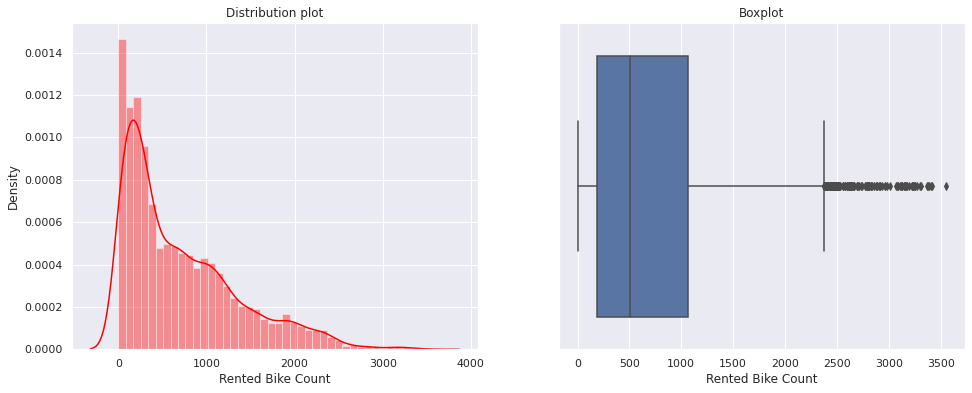

In [ ]:
#Let us look at dependent variable 'rented_bike_count'
#Densityplot
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(bike_df['Rented Bike Count'], color='red')
plt.title('Distribution plot')
#Boxplot
subplot(1,2,2)
sns.boxplot(bike_df['Rented Bike Count'])
plt.title('Boxplot');

***From above, it is clear that the dependent variable has a significant right skewed distribution and a considerable number of outliers.***

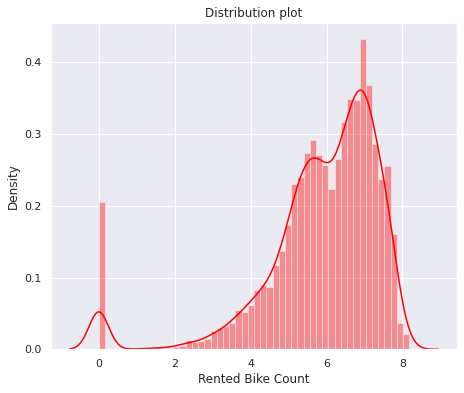

In [ ]:
#Balancing the skewness using log transformation
# log1p is used instead of log10 to make value positive in array.
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(np.log1p(bike_df['Rented Bike Count']), color='red')
plt.title('Distribution plot');

**The log transformation gives us a left skewed distriution.**

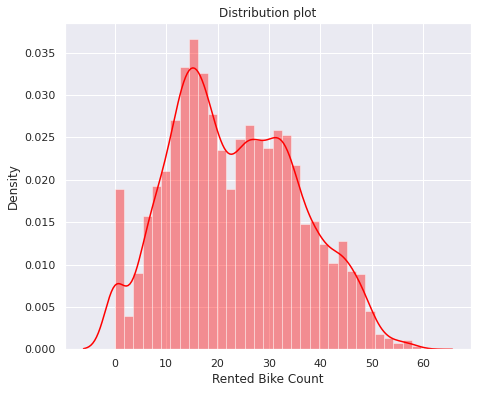

In [ ]:
#For the normalise rented bike count data use sqrt
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(np.sqrt(df['Rented Bike Count']), color='red')
plt.title('Distribution plot');

**The square root transformation on the dependent variable gives us distribution which is almost normal in nature.**

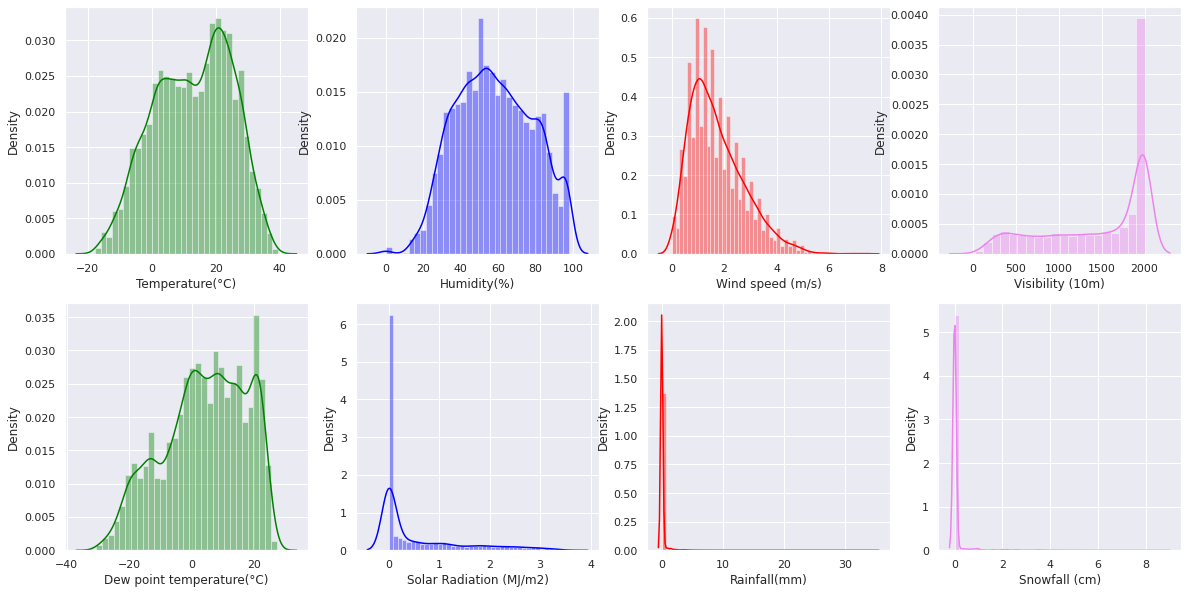

In [ ]:
# display distribution of the independent features
sns.set(rc={"figure.figsize": (20, 10)})
subplot(2,4,1)
sns.distplot(bike_df['Temperature(°C)'], color='green' )
subplot(2,4,2)
sns.distplot(bike_df['Humidity(%)'], color='blue')
subplot(2,4,3)
sns.distplot(bike_df['Wind speed (m/s)'], color='red')
subplot(2,4,4)
sns.distplot(bike_df['Visibility (10m)'], color='violet')
subplot(2,4,5)
sns.distplot(bike_df['Dew point temperature(°C)'], color='green' )
subplot(2,4,6)
sns.distplot(bike_df['Solar Radiation (MJ/m2)'], color='blue')
subplot(2,4,7)
sns.distplot(bike_df['Rainfall(mm)'], color='red')
subplot(2,4,8)
sns.distplot(bike_df['Snowfall (cm)'], color='violet');

* We can see from the preceding distplots that **"Temperature"**, **"Dew point temperature"** and **"Humidity"** follow approximately normal distribution.
* The distribution of all other variables is either left- or right-skewed.

##**Bivariate Analysis**

It is performed to find the relationship between each variable in the dataset and the target variable of interest or using 2 variables and finding the relationship between them.

In [ ]:
#Defining compare features with target variable.
comp_features = bike_df[['Temperature(°C)','Dew point temperature(°C)','Humidity(%)','Hour','Seasons','Wind speed (m/s)','Visibility (10m)']]

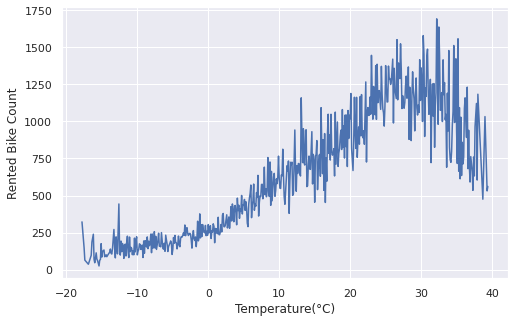

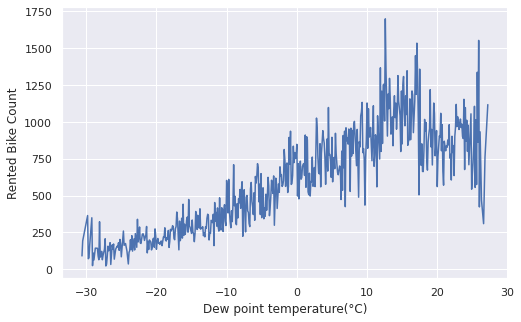

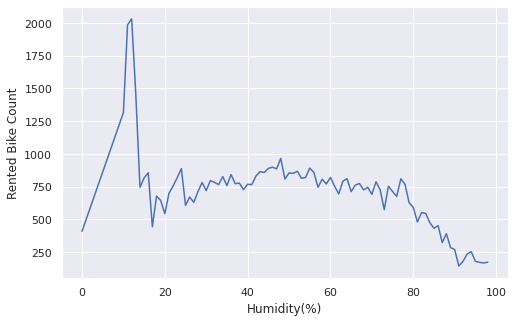

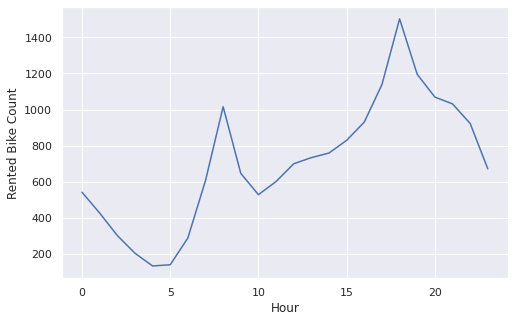

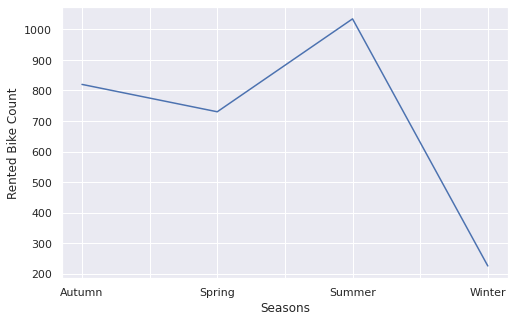

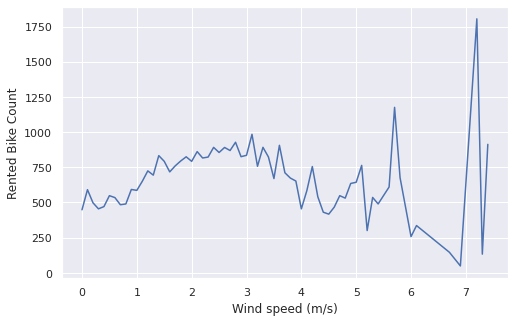

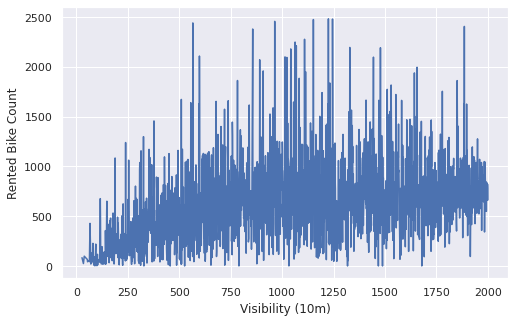

In [ ]:
#Plots
for col in comp_features:
  plt.figure(figsize=(8,5))
  bike_df.groupby(col).mean()['Rented Bike Count'].plot()
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
plt.show()

**Some of the following observations can be interpreted based on the above analysis:**

* The trend for bike rentals grows from **temperature 20 to 30 degrees** Celsius.

* The dew point temperature behaves similar to the temperature for the dependant variable.

* **Lower humidity** tends to increase demand for bike rentals.

* The bike usage is high in peak office hours that is **7-9 AM in morning and 6-8 PM in evening**.

* People prefer to drive in the **summer season** when the **wind is stronger**.

In [ ]:
#Allocating numerical features.
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'year', 'day'],
      dtype='object')

##**Let's us see the regression scatterplot for relation between independent and dependent variable:**

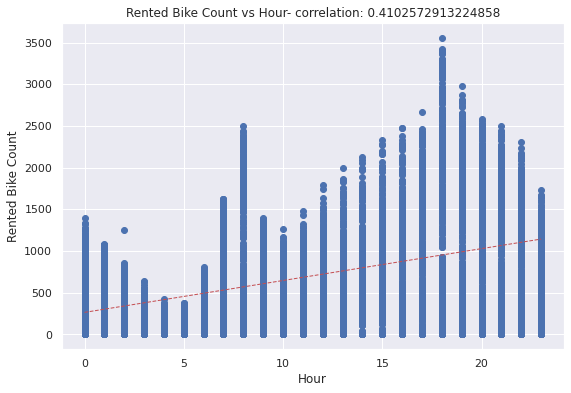

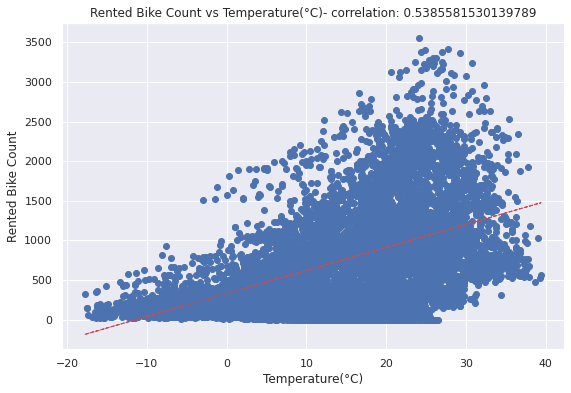

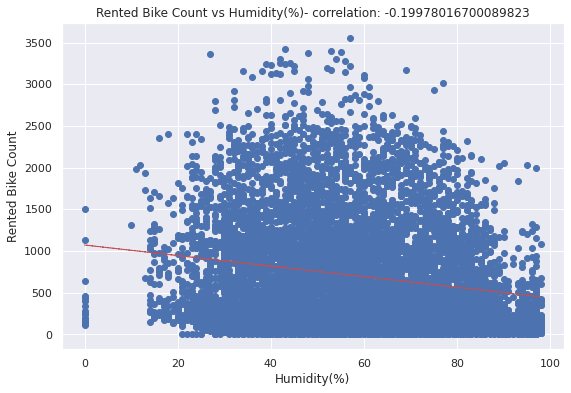

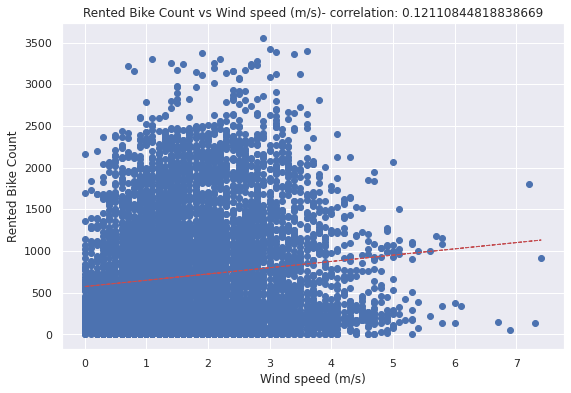

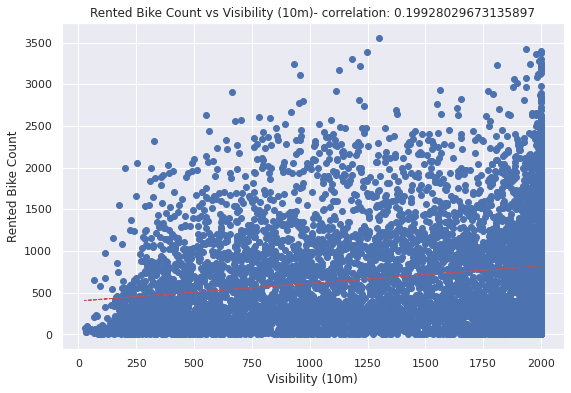

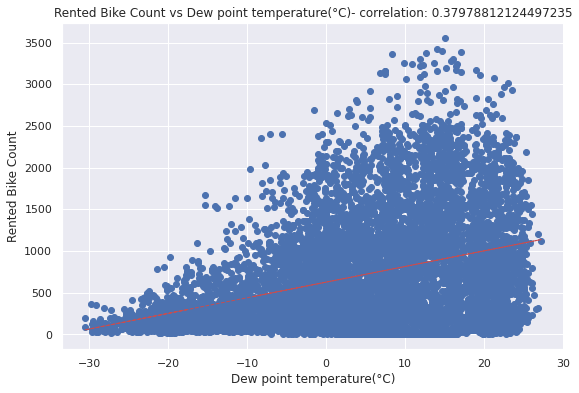

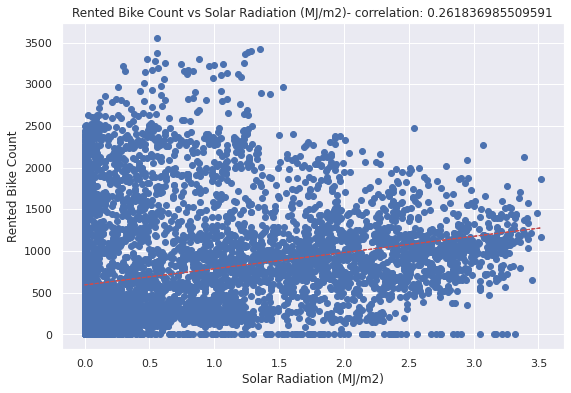

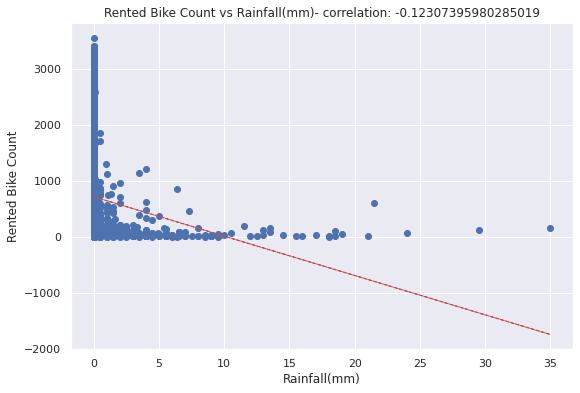

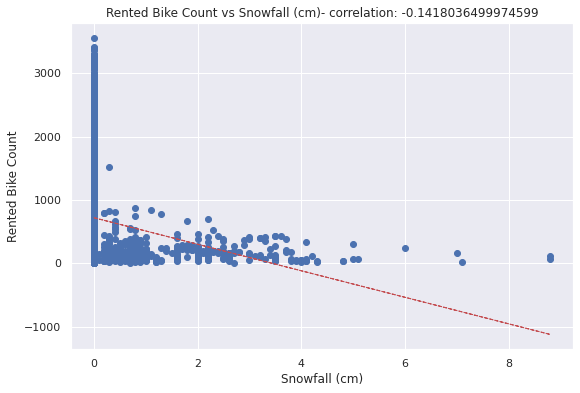

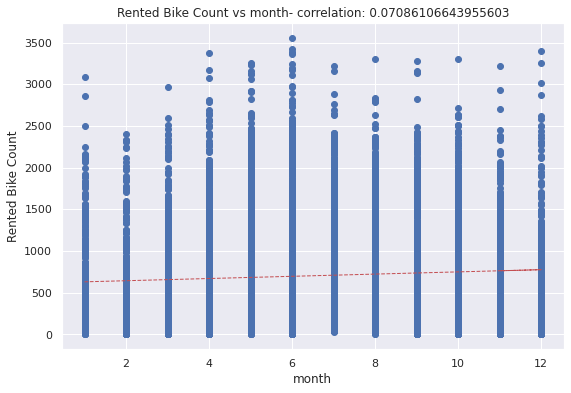

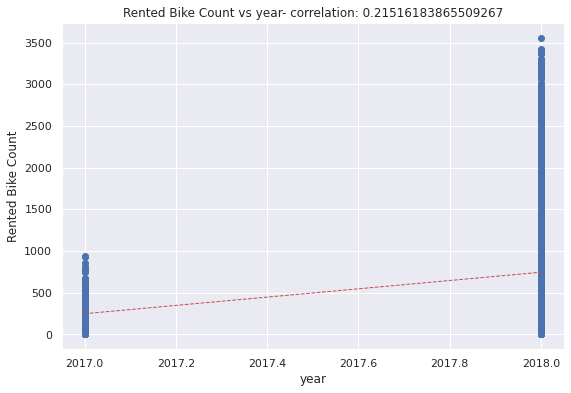

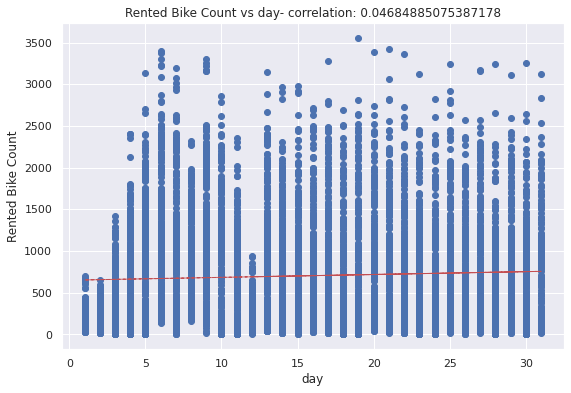

In [ ]:
# plot scatter dataset correlation of rented bike data vs all numerical variables
# check Homoscedasticity
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_df[col], bike_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bike_df[col])

    plt.plot(bike_df[col], y_hat, "r--", lw=1)

plt.show()

**We can identify the following insights using regression plot:**

*   Hour exhibits positive linearity with rented bike count, but it doesn't seems homoscadastic in nature.
*   The temperature feature has a little homoscadastic nature and is positively linear with the frequency of rented bikes.
*   Humidity, sun radiation, snowfall, and rainfall all show negative linearity with the target variable, indicating that in real-world conditions, individuals avoid riding bikes during snowfall, rain, and high humidity. 
*   Positive linearity of wind speed and visibility with rented bike count is somewhat intuitive, since higher wind speed and greater visibility tend to increase demand for rental bikes.
*   Month, Year, and Day have hardly any effect on our target variable.


##**Identifying Multicollinearity:**
A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

* Positive Correlation: both variables change in the same direction.
* Neutral Correlation: No relationship in the change of the variables.
* Negative Correlation: variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. 

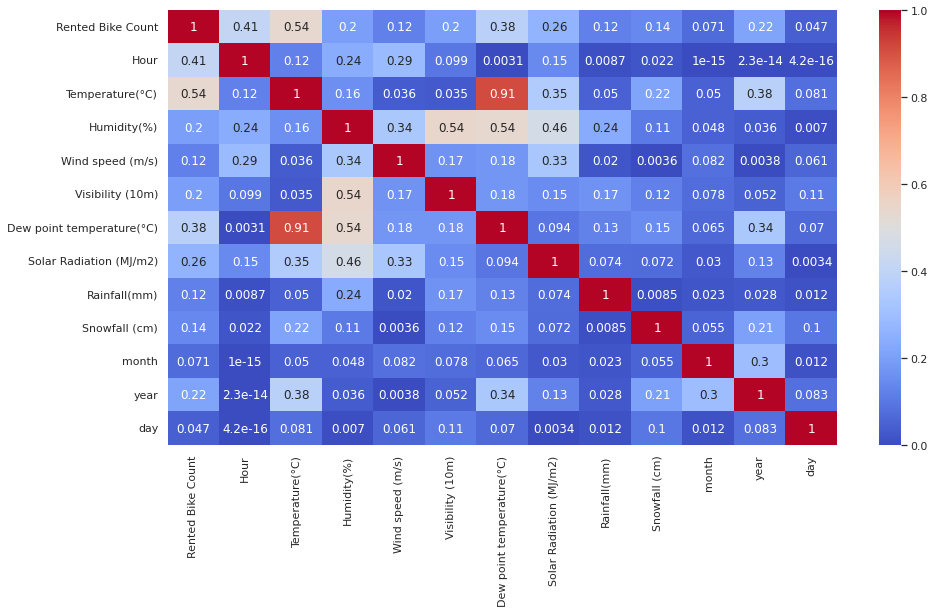

In [ ]:
## Check Correlation matrix.
plt.figure(figsize=(15,8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

**From above Heatmap we can see that:**

* The **Dew point temperature** attributes have a high correlation with the **Temperature** attributes. As a result, it can be dropped.
* As we can observe, our target variable, the Rental Bike Count, is significantly dependent on the temperature parameter.

In [ ]:
# Removing Multicollinearity
bike_df = bike_df.drop(['Dew point temperature(°C)'], axis=1)

In [ ]:
bike_df1 = bike_df.drop(['Rented Bike Count'], axis=1)

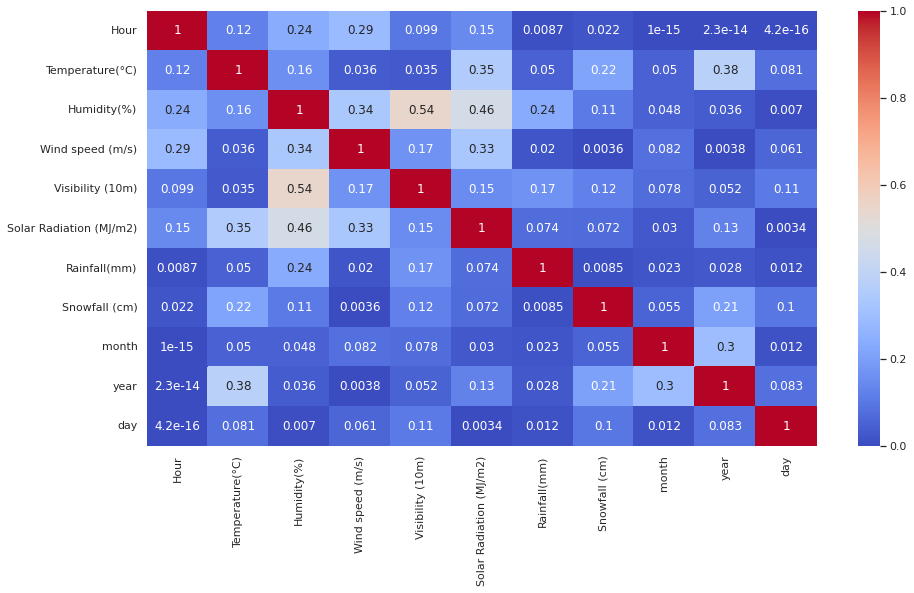

In [ ]:
plt.figure(figsize=(15,8))
correlation = bike_df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

***Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).In VIF method, we pick each feature and regress it against all of the other features.***

In [ ]:
#By using VIF score we can also remove Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Date','Rented Bike Count','month','year','day']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


**Hence, above we have defined a function called "calc_vif" to determine our Variance Inflation Factor(VIF) score for each feature.**

**Mathematically, it can be determined by 1 / (1 − R^2)**

* **This R^2 value is between independent variables.**

In [ ]:
bike_df[['Date','month','Hour','year','day']] = bike_df[['Date','month','Hour','year','day']].astype('object')

date,month, year day is date time feature.

In [ ]:
#Identifying categorical variables
categorical = [var for var in bike_df.columns if bike_df[var].dtype=='O']
print('\033[1m\033[4mThere are {} categorical variables:\033[0m '.format(len(categorical)),categorical)

There are 8 categorical variables:  ['Date', 'Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'year', 'day']


In [ ]:
#Identifying Numerical variables
numerical = [var for var in bike_df.columns if bike_df[var].dtype!='O']
print('\033[1m\033[4mThere are {} numerical variables:\033[0m '.format(len(numerical)), numerical)

There are 8 numerical variables:  ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [ ]:
#Print numerical and categorical independent features seperately.
numerical_features = numerical[1:]
categorical_features = categorical[1:]
print(numerical_features)
print(categorical_features)

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'year', 'day']


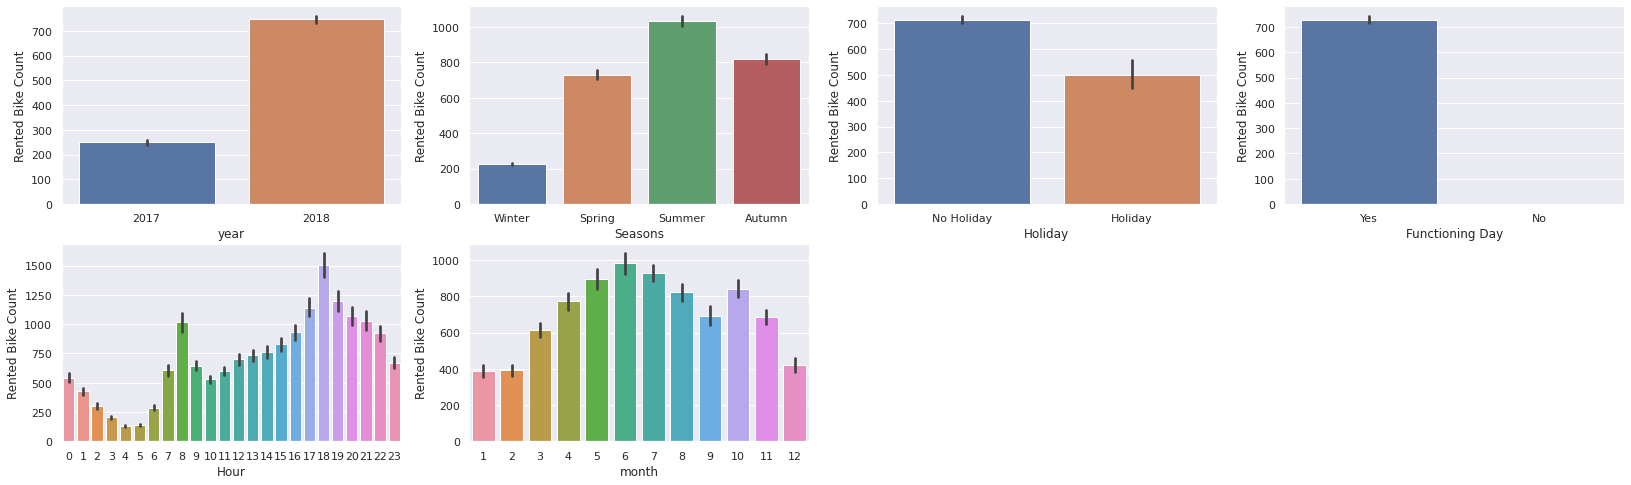

In [ ]:
#Plotting barplot for categorical features.
sns.set(rc={"figure.figsize": (28, 8)})
subplot(2,4,1)
sns.barplot(bike_df['year'], y=df['Rented Bike Count'])
subplot(2,4,2)
sns.barplot(x=bike_df['Seasons'],y=df['Rented Bike Count'])
subplot(2,4,3)
sns.barplot(x=bike_df['Holiday'],y=df['Rented Bike Count'])
subplot(2,4,4)
sns.barplot(x=bike_df['Functioning Day'],y=df['Rented Bike Count'])
subplot(2,4,5)
sns.barplot(x=bike_df['Hour'],y=df['Rented Bike Count'])
subplot(2,4,6)
sns.barplot(x=bike_df['month'],y=df['Rented Bike Count']);

**We may interpret the following information based on the above plots:**

* During **peak office hours**, it appears that rented bikes are in high demand.
* As it was seen in the preliminary analysis, riding a bike is prioritized during the **summer months**.
* On **non-holiday days**, consumption for bikes is **prominent**.
* It is intutive that, on **functioning days**, there is a **significant demand** for bikes.
* The month of **June** appears to be the most demanding one overall.

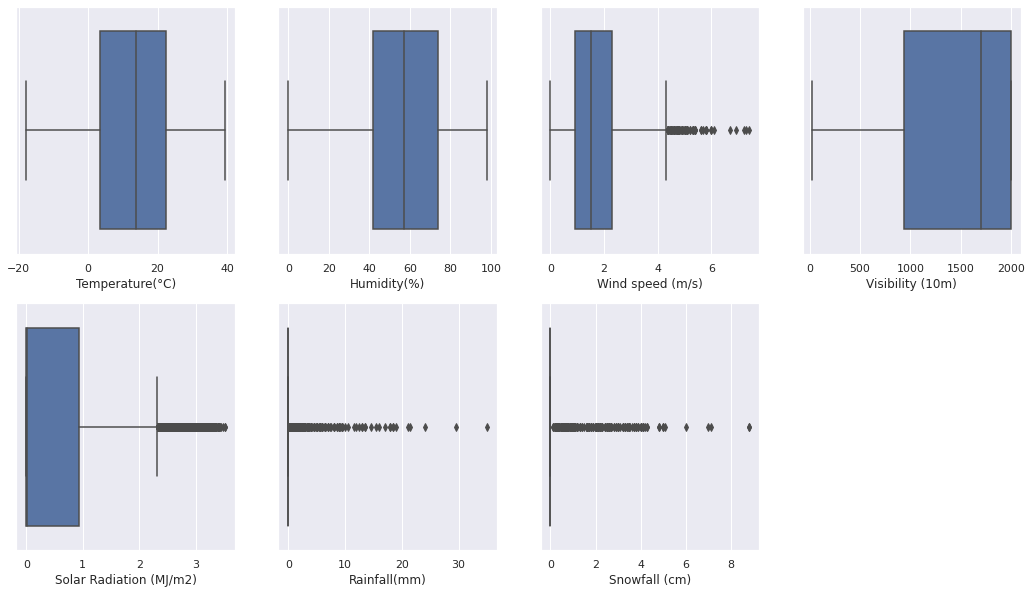

In [ ]:
#Plotting boxplot for outliers in each numerical features
sns.set(rc={"figure.figsize": (18, 10)})
subplot(2,4,1)
sns.boxplot(x=bike_df['Temperature(°C)'])
subplot(2,4,2)
sns.boxplot(x=bike_df['Humidity(%)'])
subplot(2,4,3)
sns.boxplot(x=bike_df['Wind speed (m/s)'])
subplot(2,4,4)
sns.boxplot(x=bike_df['Visibility (10m)'])
subplot(2,4,5)
sns.boxplot(x=bike_df['Solar Radiation (MJ/m2)'])
subplot(2,4,6)
sns.boxplot(x=bike_df['Rainfall(mm)'])
subplot(2,4,7)
sns.boxplot(x=bike_df['Snowfall (cm)']);

**As we Observed:**
* The highest number of outliers among all are found in **snowfall** and **rainfall**.
* Both wind speed and solar radiation constitute a substantial quantity of outliers.

**These outliers will be rectify in our analysis ahead.**

#**Data Handling**


##**Handling Outliers**

In [ ]:
#Outlier treatment:

df1 = bike_df.copy()

features1 = numerical_features

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = (Q3+(1.5*IQR))
    lower_limit = (Q1-(1.5*IQR))
    df1[i] = np.where(df1[i]> upper_limit, upper_limit,
                      np.where(df1[i]< lower_limit, lower_limit,
                        df1[i]))
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had \033[1m{}\033[0m samples.'.format(bike_df.shape[0]))
print('After removal of outliers, The dataset now has \033[1m{}\033[0m samples.'.format(df1.shape[0]))

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,day
0,2017-01-12 00:00:00,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12 00:00:00,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12 00:00:00,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12 00:00:00,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12 00:00:00,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12



Inference:
Before removal of outliers, The dataset had 8760 samples.
After removal of outliers, The dataset now has 8760 samples.


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.0,504.50,1065.25,3556.000
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.5,13.70,22.50,39.400
Humidity(%),8760.0,58.226256,20.362413,0.0,42.0,57.00,74.00,98.000
Wind speed (m/s),8760.0,1.715993,1.008186,0.0,0.9,1.50,2.30,4.400
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.0,1698.00,2000.00,2000.000
Solar Radiation (MJ/m2),8760.0,0.536235,0.785364,0.0,0.0,0.01,0.93,2.325
Rainfall(mm),8760.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.000
Snowfall (cm),8760.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.000


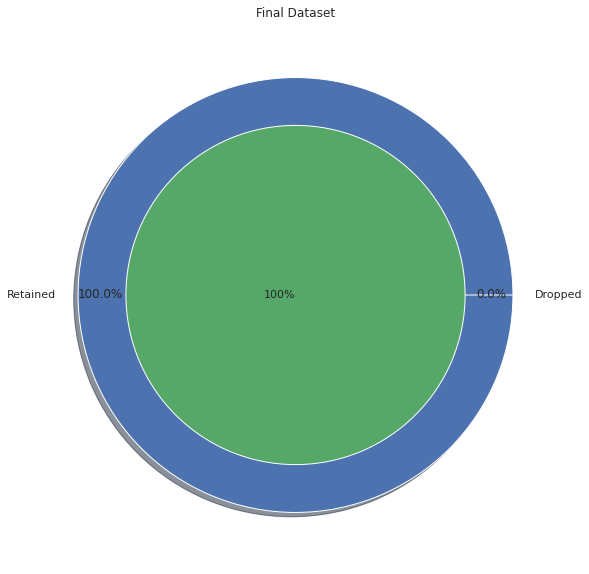


Inference: After the outlier treatment process, 0 samples were dropped, while retaining 100.0% of the data.


In [ ]:
#Final Dataset size after performing Preprocessing

bike_df = df1.copy()
bike_df.columns=[i.replace('-','_') for i in bike_df.columns]

plt.title('Final Dataset')
plt.pie([bike_df.shape[0], df.shape[0]-bike_df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([bike_df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the outlier treatment process, \033[1m{df.shape[0]-bike_df.shape[0]}\033[0m samples were dropped, \
while retaining \033[1m{round((bike_df.shape[0]*100/(df.shape[0])),2)}%\033[0m of the data.')

**We did not removed any outliers but treated them with IQR method because we have low observations in our dataset.**

#**Feature Engineering And Selection:**

##**Encoding features**

In [ ]:
#Mapping the Variables
bike_df['Isfunc_day']=bike_df['Functioning Day'].map({'Yes':1,'No':0})
bike_df['Isholiday']=bike_df['Holiday'].map({'No Holiday':0,'Holiday':1})

**Mapped the categorical variable, Yes as '1' & No as '0'.**

In [ ]:
#Converting column Seasons into dummy variables
seasons=pd.get_dummies(bike_df['Seasons'],drop_first= True)
bike_df=pd.concat([bike_df,seasons],axis='columns')

**Seasons column has 4 labels, therefore we used get_dummies for encoding them.**

In [ ]:
#Dropping unwanted transformed features.
bike_df.drop(['Functioning Day','Date','Seasons','Holiday'],axis=1,inplace=True)
bike_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,Isfunc_day,Isholiday,Spring,Summer,Winter
0,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
1,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
2,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
3,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
4,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894.0,0.0,0.0,0.0,11,2018,30,1,0,0,0,0
8756,764,20,3.4,37.0,2.3,2000.0,0.0,0.0,0.0,11,2018,30,1,0,0,0,0
8757,694,21,2.6,39.0,0.3,1968.0,0.0,0.0,0.0,11,2018,30,1,0,0,0,0
8758,712,22,2.1,41.0,1.0,1859.0,0.0,0.0,0.0,11,2018,30,1,0,0,0,0


In [ ]:
#some of the variables are not float
bike_df = bike_df.astype(float)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   float64
 1   Hour                     8760 non-null   float64
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   month                    8760 non-null   float64
 10  year                     8760 non-null   float64
 11  day                      8760 non-null   float64
 12  Isfunc_day               8760 non-null   float64
 13  Isholiday                8760 non-null   float64
 14  Spring                  

#**Model Building**

A machine learning model is a program that can find patterns or make decisions from a previously unseen dataset.The process of running a machine learning algorithm on a dataset (called training data) and optimizing the algorithm to find certain patterns or outputs is called model training. The resulting function with rules and data structures is called the trained machine learning model.


In [ ]:
#Defining the independent(X) and dependent(y) variables respectively.
X=bike_df.drop('Rented Bike Count',axis=1)
y=np.sqrt(bike_df['Rented Bike Count'])
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64

**Here, We have transformed our dependent variable with square root transformation to feed into the model.**

In [ ]:
#Train test split.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


**Splitting data into 80% train set and 20% test set.**

##**Scaling**

In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1m\033[4mStandardardization on Training set:\033[0m'.center(0))
X_train = std.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
display(X_train.describe())

print('\n','\033[1m\033[4mStandardardization on Training set:\033[0m'.center(0))
X_test = std.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
display(X_test.describe())

Standardardization on Training set:


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,Isfunc_day,Isholiday,Spring,Summer,Winter
count,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7008.0,7008.0,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03
mean,-1.186266e-16,8.364694e-18,3.802134e-17,1.936553e-16,-1.500575e-16,-7.300097e-17,0.0,0.0,6.590365e-18,-2.960383e-13,-8.111218e-17,9.049078e-17,7.300097e-17,1.850372e-17,-5.779243e-17,2.636146e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.0,0.0,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.657637e+00,-2.560454e+00,-2.860974e+00,-1.696371e+00,-2.305680e+00,-6.834845e-01,0.0,0.0,-1.606254e+00,-3.307366e+00,-1.671014e+00,-5.478033e+00,-2.320228e-01,-5.786684e-01,-5.791078e-01,-5.711987e-01
25%,-7.914822e-01,-7.980295e-01,-7.942122e-01,-8.069673e-01,-8.114504e-01,-6.834845e-01,0.0,0.0,-7.351330e-01,3.023554e-01,-8.777448e-01,1.825473e-01,-2.320228e-01,-5.786684e-01,-5.791078e-01,-5.711987e-01
50%,7.467202e-02,7.065369e-02,-5.608294e-02,-2.140312e-01,4.282677e-01,-6.708054e-01,0.0,0.0,1.359884e-01,3.023554e-01,2.884850e-02,1.825473e-01,-2.320228e-01,-5.786684e-01,-5.791078e-01,-5.711987e-01
75%,7.964673e-01,8.056933e-01,7.804636e-01,6.753729e-01,9.241550e-01,5.083461e-01,0.0,0.0,1.007110e+00,3.023554e-01,8.221176e-01,1.825473e-01,-2.320228e-01,1.728105e+00,1.726794e+00,-5.711987e-01
max,1.662622e+00,2.208951e+00,1.961470e+00,2.651827e+00,9.241550e-01,2.264394e+00,0.0,0.0,1.587857e+00,3.023554e-01,1.728711e+00,1.825473e-01,4.309921e+00,1.728105e+00,1.726794e+00,1.750704e+00



 Standardardization on Training set:


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,Isfunc_day,Isholiday,Spring,Summer,Winter
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.0,1752.0,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,0.012463,0.012027,0.021297,-0.002905,-0.002916,-0.017950,0.0,0.0,-0.008204,-0.021119,-0.014101,-0.040387,-0.040183,0.013825,0.010529,0.006626
std,0.996618,0.988474,1.009816,0.981432,0.994145,0.978507,0.0,0.0,1.006075,1.031321,0.984234,1.101330,0.913784,1.008107,1.006256,1.004165
min,-1.657637,-2.535396,-2.860974,-1.696371,-2.315532,-0.683484,0.0,0.0,-1.606254,-3.307366,-1.671014,-5.478033,-0.232023,-0.578668,-0.579108,-0.571199
25%,-0.935841,-0.733296,-0.745004,-0.708145,-0.844701,-0.683484,0.0,0.0,-1.025507,0.302355,-0.877745,0.182547,-0.232023,-0.578668,-0.579108,-0.571199
50%,-0.069687,0.108241,-0.006874,-0.214031,0.426626,-0.670805,0.0,0.0,0.135988,0.302355,0.028849,0.182547,-0.232023,-0.578668,-0.579108,-0.571199
75%,0.940826,0.805693,0.829672,0.576550,0.922513,0.444951,0.0,0.0,1.007110,0.302355,0.822118,0.182547,-0.232023,1.728105,1.726794,-0.571199
max,1.662622,2.217303,1.961470,2.651827,0.924155,2.264394,0.0,0.0,1.587857,0.302355,1.728711,0.182547,4.309921,1.728105,1.726794,1.750704


**Scaling is a step of Data Pre Processing that is applied to independent variables or features of data. It basically helps to normalize the data within a particular range.**

**We use standardscaler here which has its value fit in Gaussian distribution.**

In [ ]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'Rented Bike Count':'Actual Count'},inplace = True)

**With the aid of the above code, we will compare our actual values with the predicted values ahead.**

##**Modelling**
##Linear Regression
Linear regression is used to identify relationships between the variable of interest and the inputs, and predict its values based on the values of the input variables.

In [ ]:
#Fitting linear regression model. 
reg = LinearRegression()
reg.fit(X_train,y_train)
#Check regression score.
lin_train_pred = reg.predict(X_train)
lin_train_r2score = r2_score((lin_train_pred), (y_train))*100
print(lin_train_r2score)

42.717820264069964


In [ ]:
#Predicting on testing dataset
y_pred = reg.predict(X_test)
y_pred

array([17.91212699, 24.7490221 , 19.17821698, ..., 13.65727442,
       32.22283866, 20.47114058])

In [ ]:
#Check Intercept.
reg.intercept_

23.55011559839731

In [ ]:
#Check coefficient values.
coef_= reg.coef_
coef_

array([ 3.28691360e+00,  5.58957869e+00, -3.68165616e+00,  8.44443666e-02,
        1.86043883e-01, -7.06201600e-01,  1.77635684e-15,  0.00000000e+00,
        7.18601197e-03, -6.79712765e-01, -9.50993636e-02,  5.02308039e+00,
       -6.55484435e-01, -1.32441036e+00, -1.21583377e+00, -3.89445226e+00])

In [ ]:
#Add feature list and their respective coefficient into Dataframe.
res= {X.columns[i]: coef_[i] for i in range(len(X.columns))}
a= pd.DataFrame.from_dict(res, orient='index').sort_values(by= 0 , ascending=False)

a

,0
Temperature(°C),5.589579e+00
Isfunc_day,5.023080e+00
Hour,3.286914e+00
Visibility (10m),1.860439e-01
Wind speed (m/s),8.444437e-02
month,7.186012e-03
Rainfall(mm),1.776357e-15
Snowfall (cm),0.000000e+00
day,-9.509936e-02
Isholiday,-6.554844e-01


In [ ]:
#Defining a function determine mean absolute percentage error.
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In the above code we defined a function which helps us to calculate mean absolute percentage error of our model. The lower the percentage, the more accurate the model, so 10% is better than 60%.

a general rule of thumb that I follow is:

MAPE :	Interpretation

=< 10 % :	Very good

10 % - 20 % :	Good

20 % - 50 % :	OK

=> 50 % :	Not good



In [ ]:
#Regression Evaluation Metrics for Linear Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred))
print("\033[1mMSE\033[0m :" , MSE)

RMSE = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE)

MAPE= mean_absolute_percentage_error(y_test, y_pred)
print("\033[1mMAPE\033[0m: ",MAPE)

print(f'\033[1mTrain R2_Score\033[0m: {lin_train_r2score}')

r2 = r2_score((y_test), (y_pred))*100
print("\033[1mR2\033[0m :" ,r2)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 57.62408031707457
RMSE : 7.5910526488145615
MAPE:  37.32595006456338
Train R2_Score: 42.717820264069964
R2 : 63.41008964855218
Adjusted R2 :  63.07266108046967


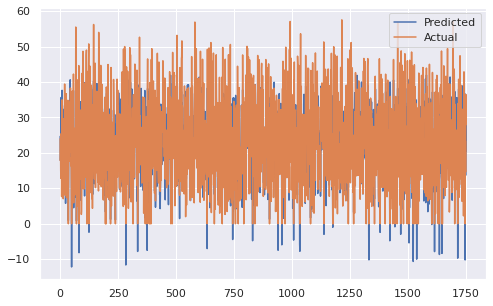

In [ ]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Compairing the prediction with original data.
test_df['Predicted Count'] = y_pred
knn_df = test_df.loc[:,['Actual Count','Predicted Count']]
knn_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,17.912127
6914,24.083189,24.749022
233,15.033296,19.178217
982,12.845233,15.731046
5967,25.416530,35.637790


In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information/Feature Importance.
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Temperature(°C)            0.387539
Hour                       0.346433
Winter                     0.205131
Solar Radiation (MJ/m2)    0.179439
day                        0.179382
Isfunc_day                 0.142277
month                      0.135610
Humidity(%)                0.100784
Summer                     0.060507
Visibility (10m)           0.058636
year                       0.057225
Wind speed (m/s)           0.027026
Spring                     0.011398
Snowfall (cm)              0.004503
Rainfall(mm)               0.001133
Isholiday                  0.000000
dtype: float64

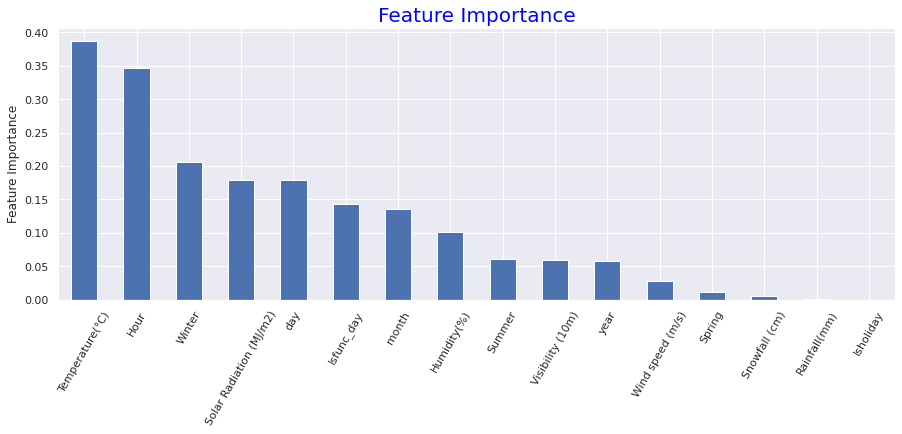

In [ ]:
#Feature Importance Plot.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Feature Importance',fontsize=20, color = 'blue')
plt.xticks(rotation=60)
plt.ylabel("Feature Importance");


**Observations:**

* After implementing the linear regression algorithm, we obtain a R2 score of 63.41 %, which is considered appropriate but we have also seen MAPE as 37.32%, which needs to be reduce further. Therefore, we will now attempt to maximize our R2 score and reduce MAPE% by introducing more regression algorithms to our dataset.
* For a linear regression model, the **Temperature** feature seems to be very significant following Hour and Winter.

#Lasso regression
This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

In [ ]:
#Implementing fit to our dataset.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)
#Check regression score.
lass_train_pred = lasso.predict(X_train)
lass_train_r2score = r2_score((lass_train_pred), (y_train))*100
print(lass_train_r2score)

42.71473496940889


In [ ]:
#Print coefficients
lasso.coef_

array([ 3.28694916,  5.5890169 , -3.68129705,  0.08425209,  0.18615174,
       -0.70576312,  0.        ,  0.        ,  0.0073185 , -0.67937385,
       -0.09488582,  5.02286319, -0.65534619, -1.32397228, -1.21525397,
       -3.89402828])

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("\033[1mThe best fit alpha value is found out to be :\033[0m" ,lasso_regressor.best_params_)
print("\n\033[1mUsing ",lasso_regressor.best_params_, " the negative mean squared error is:\033[0m ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -56.45970374479147


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([17.91816994, 24.73639975, 19.1606281 , ..., 13.66806902,
       32.21465513, 20.46370459])

In [ ]:
#Regression Evaluation Metrics for Lasso Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_lasso = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_lasso)

MAPE_lasso= mean_absolute_percentage_error(y_test, y_pred_lasso)
print("\033[1mMAPE\033[0m: ",MAPE_lasso)

print(f'\033[1mTrain R2_Score\033[0m: {lass_train_r2score}')

r2_lasso = r2_score((y_test), (y_pred_lasso))*100
print("\033[1mR2\033[0m :" ,r2_lasso)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 57.629488565755665
RMSE : 7.591408865668853
MAPE:  37.330977752734356
Train R2_Score: 42.71473496940889
R2 : 63.40665554021916
Adjusted R2 :  63.06919530312608


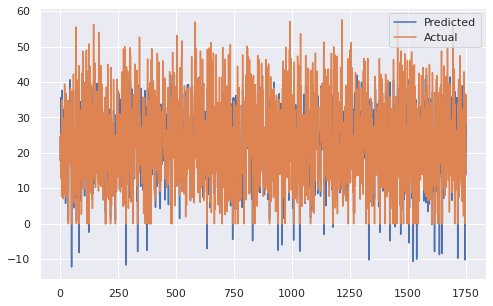

In [ ]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#Ridge regression
Similar to the lasso regression, ridge regression puts a similar constraint on the coefficients by introducing a penalty factor. However, while lasso regression takes the magnitude of the coefficients, ridge regression takes the square.
Ridge regression is also referred to as L2 Regularization.

In [ ]:
#Implement ridge regression to our dataset.
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("\033[1mThe best fit alpha value is found out to be :\033[0m" ,ridge_regressor.best_params_)
print("\n\033[1mUsing ",ridge_regressor.best_params_, " the negative mean squared error is:\033[0m ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -56.467924009977935


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
#Regression Evaluation Metrics for Ridge Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_ridge = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_ridge)

MAPE_ridge= mean_absolute_percentage_error(y_test, y_pred_ridge)
print("\033[1mMAPE\033[0m: ",MAPE_ridge)

r2_ridge = r2_score((y_test), (y_pred_ridge))*100
print("\033[1mR2\033[0m :" ,r2_ridge)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 57.631194992656425
RMSE : 7.591521256813842
MAPE:  37.33286741443935
R2 : 63.40557200002248
Adjusted R2 :  63.06810177062787


#Elastic net
Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

In [ ]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.001, l1_ratio=1)
#Fitting the elasticnet.
elasticnet.fit(X_train,y_train)
#Check regression score.
en_train_pred = elasticnet.predict(X_train)
en_train_r2score = r2_score((en_train_pred), (y_train))*100
print(en_train_r2score)

42.68690162574271


In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
#Regression Evaluation Metrics for Elasticnet Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_en))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_elasticnet = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_elasticnet)

MAPE_en= mean_absolute_percentage_error(y_test, y_pred_en)
print("\033[1mMAPE\033[0m: ",MAPE_en)

print(f'\033[1mTrain R2_Score\033[0m: {en_train_r2score}')

r2_elasticnet = r2_score((y_test), (y_pred_en))*100
print("\033[1mR2\033[0m :" ,r2_elasticnet)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 57.627925386209306
RMSE : 7.591305907827013
MAPE:  37.329508537891265
Train R2_Score: 42.68690162574271
R2 : 63.407648121777946
Adjusted R2 :  63.070197038174754


In [ ]:
#Cross Validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("\033[1mThe best fit alpha value is found out to be :\033[0m" ,elastic_regressor.best_params_)
print("\n\033[1mUsing ",elastic_regressor.best_params_, " the negative mean squared error is:\033[0m ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.4}

Using  {'alpha': 0.001, 'l1_ratio': 0.4}  the negative mean squared error is:  -56.459718994778726


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
#Regression Evaluation Metrics for Elasticnet cv Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_elasticnet_cv = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_elasticnet_cv)

MAPE_elasticnet_cv= mean_absolute_percentage_error(y_test, y_pred_elastic)
print("\033[1mMAPE\033[0m: ",MAPE_elasticnet_cv)

r2_elasticnet_cv = r2_score((y_test), (y_pred_elastic))*100
print("\033[1mR2\033[0m :" ,r2_elasticnet_cv)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 57.631612333489635
RMSE : 7.591548744063338
MAPE:  37.333238368145324
R2 : 63.40530699859273
Adjusted R2 :  63.0678343253809


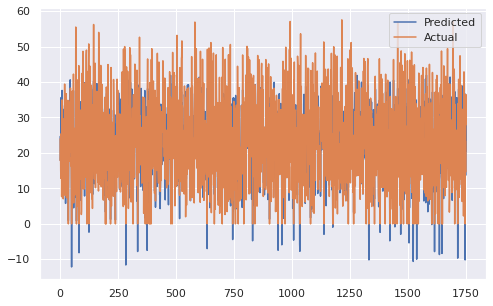

In [ ]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Hence, we observed before in EDA that our dataset is non-linear. Therefore the performance of above linear models are intuitive enough to try on tree-based algorithm ahead for our analysis.**

#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#Implementing Decision Tree.
dt_regressor = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 40 , random_state=0)
dt_regressor.fit(X_train, y_train)
#Check Score
dt_train_pred = dt_regressor.predict(X_train)
dt_train_r2score = r2_score((dt_train_pred), (y_train))*100
print(dt_train_r2score)

83.83097188668908


In [ ]:
#Predicting the test data.
y_pred_dt=dt_regressor.predict(X_test)
y_pred_dt

array([15.30794602, 21.80866439, 18.79494865, ..., 22.99634354,
       31.92752417, 22.99634354])

In [ ]:
#Regression Evaluation Metrics for Decision Tree
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_dt))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_dt = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_dt)

MAPE_dt= mean_absolute_percentage_error(y_test, y_pred_dt)
print("\033[1mMAPE\033[0m: ",MAPE_dt)

print(f'\033[1mTrain R2_Score\033[0m: {dt_train_r2score}')

r2_dt = r2_score((y_test), (y_pred_dt))*100
print("\033[1mR2\033[0m :" ,r2_dt)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 24.788747630784922
RMSE : 4.978829945959685
MAPE:  21.269498987472602
Train R2_Score: 83.83097188668908
R2 : 84.2597391829206
Adjusted R2 :  84.11458403993889


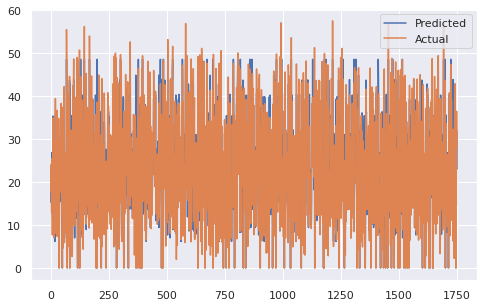

In [ ]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_dt))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_dt
dt_df = test_df.loc[:,['Actual Count','Predicted Count']]
dt_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,15.307946
6914,24.083189,21.808664
233,15.033296,18.794949
982,12.845233,15.211957
5967,25.416530,26.851646


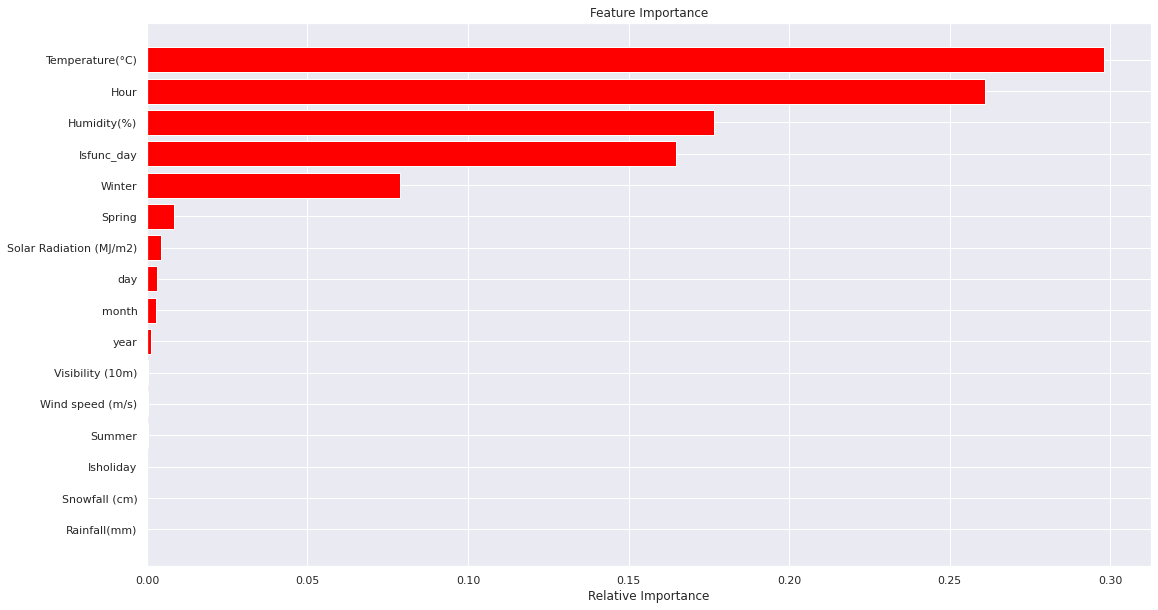

In [ ]:
#Feature importance for Decision Tree.
features = X_train.columns
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


**Observations:**

* After implementing the Decision Tree algorithm, we obtain a R2 score of 81.76 % and MAPE as 19.45%, both are improved majorly. We will now attempt to maximize our R2 score and minimize MAPE% by introducing more tree-based and boosting algorithms to our dataset.
* For a Decision Tree model, the **Temperature** feature seems to be very significant following Hour and Humidity.

#Random Forest Regressor

In [ ]:
#Implementing the Random Forest Regressor.
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train,y_train)
#Check Score
rf_train_pred = rf_regressor.predict(X_train)
rf_train_r2score = r2_score((rf_train_pred), (y_train))*100
print(rf_train_r2score)

97.71341791655533


In [ ]:
#Predicting the test data.
y_pred_rf=rf_regressor.predict(X_test)
y_pred_rf

array([16.20243757, 20.39761726, 21.68925497, ..., 22.61715317,
       35.11302402, 23.35663669])

In [ ]:
#Regression Evaluation Metrics for Random Forest Regressor.
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_rf))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_rf = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_rf)

MAPE_rf= mean_absolute_percentage_error(y_test, y_pred_rf)
print("\033[1mMAPE\033[0m: ",MAPE_rf)

print(f'\033[1mTrain R2_Score\033[0m: {rf_train_r2score}')

r2_rf = r2_score((y_test), (y_pred_rf))*100
print("\033[1mR2\033[0m :" ,r2_rf)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 19.61121633525861
RMSE : 4.4284552990019685
MAPE:  17.05255005361431
Train R2_Score: 97.71341791655533
R2 : 87.5473475040028
Adjusted R2 :  87.43251036282935


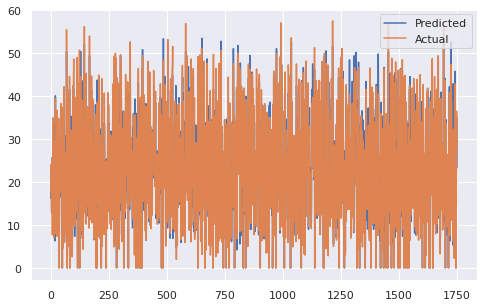

In [ ]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_rf))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_rf
rf_df = test_df.loc[:,['Actual Count','Predicted Count']]
rf_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,16.202438
6914,24.083189,20.397617
233,15.033296,21.689255
982,12.845233,13.264721
5967,25.416530,25.626315


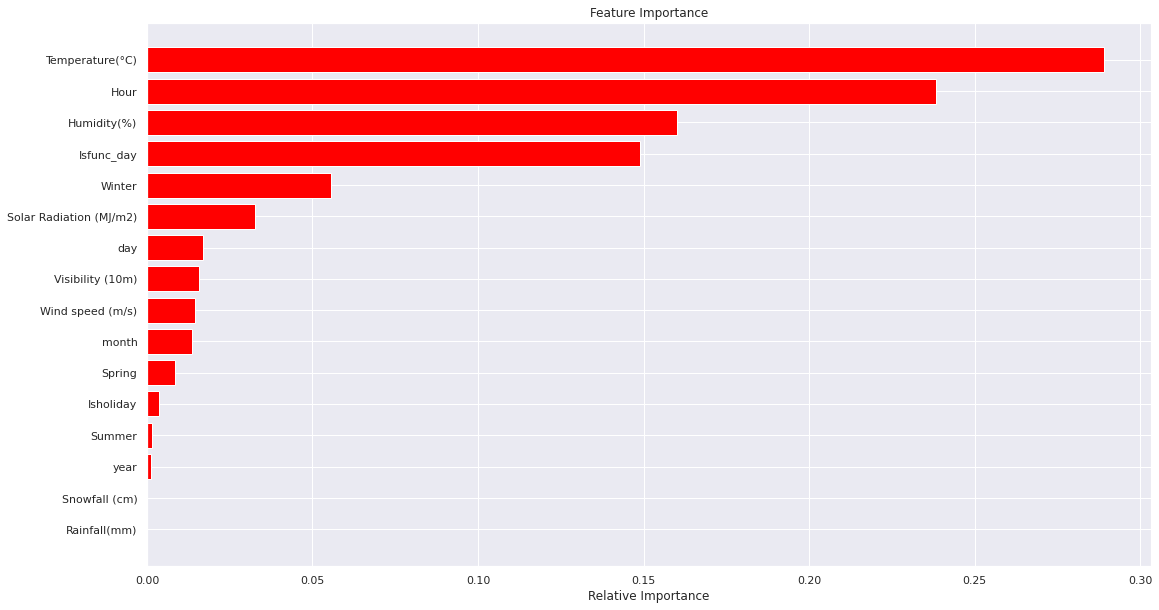

In [ ]:
#Feature importance for Decision Tree.
features = X_train.columns
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


**Observations:**

* After implementing the Random Forest algorithm, we obtain a R2 score of 87.54 % and MAPE as 17.05%, both can be considered as better. We will now attempt to maximize our R2 score and minimize MAPE% by introducing more boosting algorithms to our dataset.
* For a Random Forest model, the **Temperature** feature seems to be very significant following Hour and Humidity.

#XG Boosting

In [ ]:
#Implementing XG Boosting.
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(objective ='reg:linear',
                  n_estimators=70, max_depth=10, eta=0.08,subsample=0.8, reg_lambda=1.2)
xgb_reg.fit(X_train, y_train)
#Check Score
xgb_train_pred = xgb_reg.predict(X_train)
xgb_train_r2score = r2_score((xgb_train_pred), (y_train))*100
print(xgb_train_r2score)

[07:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
99.03840706106978


In [ ]:
#Predicting the test data.
y_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
#Regression Evaluation Metrics for XG Boosting.
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_xgb))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_xgb = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_xgb)

MAPE_xgb= mean_absolute_percentage_error(y_test, y_pred_xgb)
print("\033[1mMAPE\033[0m: ",MAPE_xgb)

print(f'\033[1mTrain R2_Score\033[0m: {xgb_train_r2score}')

r2_xgb = r2_score((y_test), (y_pred_xgb))*100
print("\033[1mR2\033[0m :" ,r2_xgb)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 14.639224063511193
RMSE : 3.8261238954732235
MAPE:  14.164014457891428
Train R2_Score: 99.03840706106978
R2 : 90.70444346961813
Adjusted R2 :  90.61872075809875


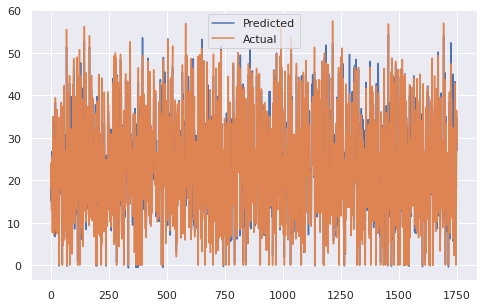

In [ ]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_xgb))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_xgb
xgb_df = test_df.loc[:,['Actual Count','Predicted Count']]
xgb_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,15.154214
6914,24.083189,21.658308
233,15.033296,16.423199
982,12.845233,13.064808
5967,25.416530,26.728270


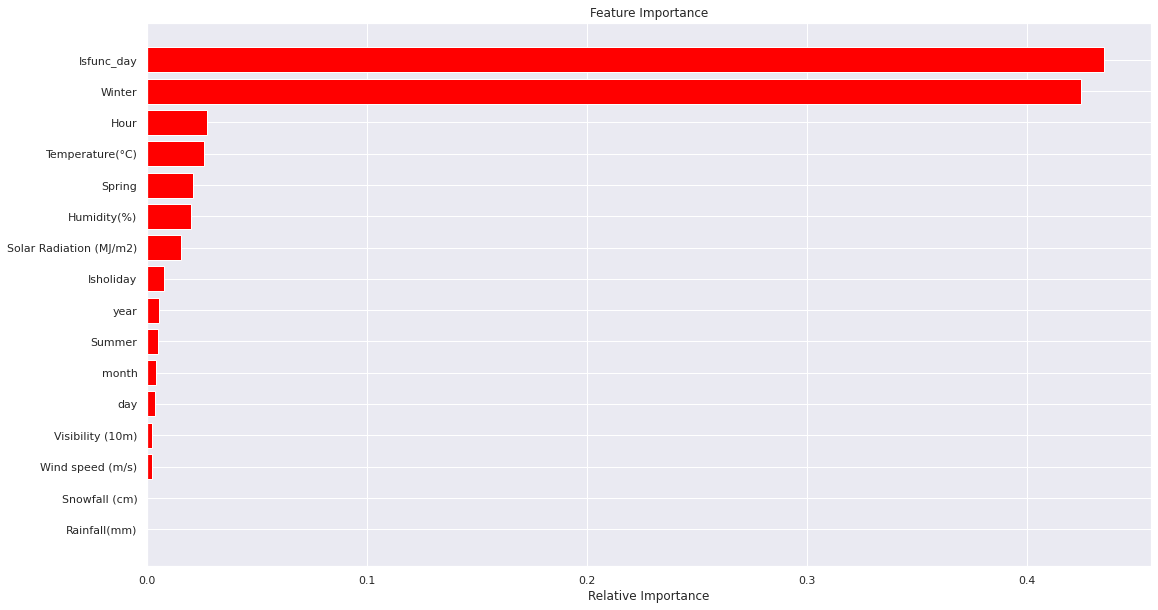

In [ ]:
#Feature importance for Decision Tree.
features = X_train.columns
importances = xgb_reg.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


**Observations:**

* After implementing the XG Boosting algorithm, we obtain a R2 score of 90.70 % and MAPE as 14.16%, both are best till now. We will now attempt to maximize our R2 score and try to reduce MAPE% more by introducing other boosting algorithms to our dataset.
* For a XG Boosting model, the **Isfunc_day** feature seems to be very significant following Winter and Hour.

#Cat Boosting





In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
#Implementing Cat Boosting.
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor(learning_rate= 0.5,verbose=500)
cat_reg.fit(X_train,y_train)
#Check Score
cat_train_pred = cat_reg.predict(X_train)
cat_train_r2score = r2_score((cat_train_pred), (y_train))*100
print(cat_train_r2score)

0:	learn: 8.5719082	total: 48.9ms	remaining: 48.9s
500:	learn: 1.2488493	total: 1.46s	remaining: 1.46s
999:	learn: 0.6514481	total: 2.62s	remaining: 0us
99.72120842507425


In [ ]:
#Predicting the test data.
y_pred_cat = cat_reg.predict(X_test)

In [ ]:
#Regression Evaluation Metrics for Cat Boosting.
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_cat))
print("\033[1mMSE\033[0m :" , MSE)

RMSE_cat = np.sqrt(MSE)
print("\033[1mRMSE\033[0m :" ,RMSE_cat)

MAPE_cat= mean_absolute_percentage_error(y_test, y_pred_cat)
print("\033[1mMAPE\033[0m: ",MAPE_cat)

print(f'\033[1mTrain R2_Score\033[0m: {cat_train_r2score}')

r2_cat = r2_score((y_test), (y_pred_cat))*100
print("\033[1mR2\033[0m :" ,r2_cat)
print("\033[1mAdjusted R2\033[0m : ",(1-(1-r2_score((y_test), (y_pred_cat)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 14.94210974352704
RMSE : 3.865502521474671
MAPE:  15.86360476201422
Train R2_Score: 99.72120842507425
R2 : 90.51211831982769
Adjusted R2 :  90.4246220046215


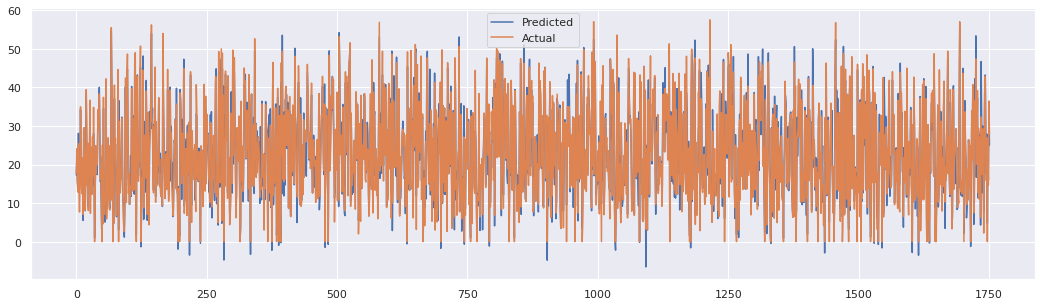

In [ ]:
#Check performance of the model through plot.
plt.figure(figsize=(18,5))
plt.plot((y_pred_cat))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_cat
cat_df = test_df.loc[:,['Actual Count','Predicted Count']]
cat_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,17.289697
6914,24.083189,21.625536
233,15.033296,15.653143
982,12.845233,14.019975
5967,25.416530,28.099738


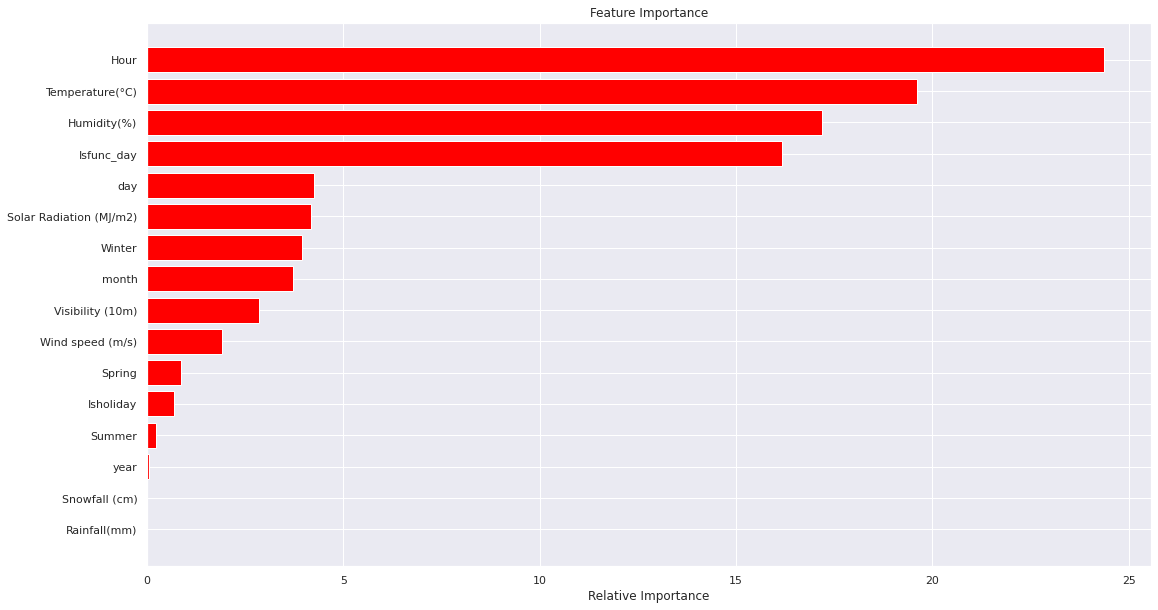

In [ ]:
#Feature importance for Decision Tree.
features = X_train.columns
importances = cat_reg.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


**Observations:**

* After implementing the Cat Boosting algorithm, we obtain R2 score of 90.51 % and MAPE 15.86%, which is considered good. Therefore, we will end our analysis here. 
* For a Cat Boosting model, the **Hour** feature seems to be very significant following Temperature and Humidity.

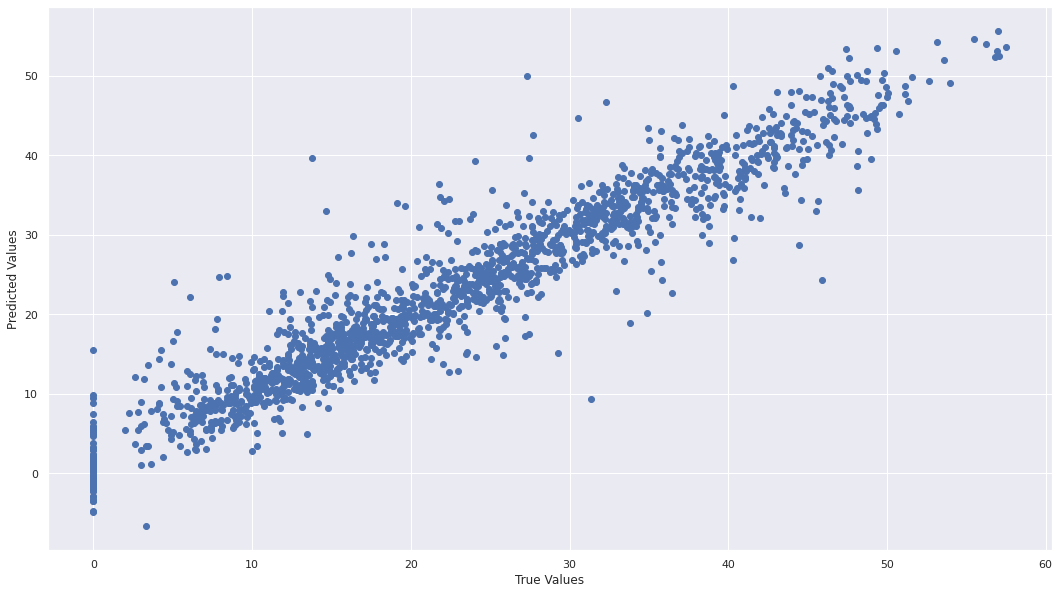

In [ ]:
#Analysing True values and Predicted Values
plt.scatter(y_test,y_pred_cat)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

***Above plot shows the perfect linear relation between true values to predicted values of Test dataset.***

#**Comparing evaluation metrics of the models being used.**

##Comparing R square of all the models being used for testing dataset.

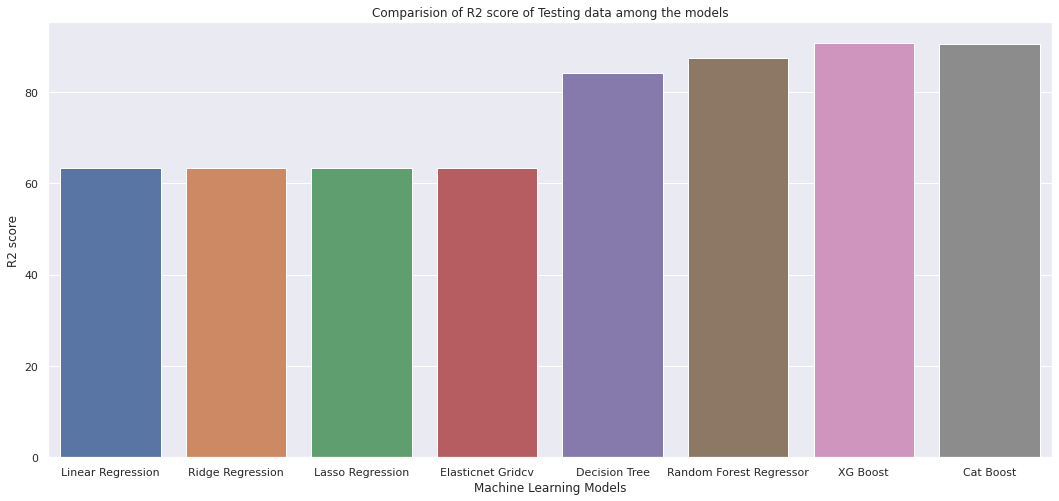

In [ ]:
models = ['Linear Regression','Ridge Regression','Lasso Regression','Elasticnet Gridcv','Decision Tree','Random Forest Regressor','XG Boost','Cat Boost']
acc = [r2,r2_ridge,r2_lasso,r2_elasticnet_cv,r2_dt,r2_rf,r2_xgb,r2_cat]
plt.figure(figsize=(18,8))

plt.ylabel("R2 score")
plt.xlabel("Machine Learning Models")
sns.barplot(x= models, y= acc)
plt.title('Comparision of R2 score of Testing data among the models')
plt.show()

In [ ]:
#Comparing the hypertuned models by adding them into dataframe.
rmse_lst = [RMSE,RMSE_ridge,RMSE_lasso,RMSE_elasticnet_cv,RMSE_dt,RMSE_rf,RMSE_xgb,RMSE_cat]
mape_lst = [MAPE,MAPE_ridge,MAPE_lasso,MAPE_elasticnet_cv,MAPE_dt,MAPE_rf,MAPE_xgb,MAPE_cat]
acc_lst = [i/100 for i in acc]
hypertune_evaluation = pd.DataFrame({'Model': models,
                           'RMSE': rmse_lst,
                           'R2_Score': acc_lst,
                           'MAPE' : mape_lst })
print('\033[1m\033[4mThis dataframe shows hypertuned models evaluation scores\033[0m:','\n')
hypertune_evaluation

This dataframe shows hypertuned models evaluation scores: 



,Model,RMSE,R2_Score,MAPE
0,Linear Regression,7.591053,0.634101,37.325950
1,Ridge Regression,7.591521,0.634056,37.332867
2,Lasso Regression,7.591409,0.634067,37.330978
3,Elasticnet Gridcv,7.591549,0.634053,37.333238
4,Decision Tree,4.978830,0.842597,21.269499
5,Random Forest Regressor,4.428455,0.875473,17.052550
6,XG Boost,3.826124,0.907044,14.164014
7,Cat Boost,3.865503,0.905121,15.863605


***The XG Boost model, which predicted the data more accurately, came out on top, followed by Cat Boost and Random Forest for the hypertuned models.***

#Let us check R2 scores of our baseline models(without any tuning).

In [ ]:
#Comparing the plain vanilla models.
algos = [LinearRegression(),  Ridge(), Lasso(),
           ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), CatBoostRegressor() ]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
          'Elastic Net', 'Decision Tree Regressor', 'Random Forest Regressor', 'XG Boost Regression', 'Cat Boost Regression']

rmse_list = []
mape_list = []
R2 = []

In [ ]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2_final = r2_score((y_test), (y_pred))
    R2.append(r2_final)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    mape_list.append(MAPE)

[07:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.055691
0:	learn: 11.9469172	total: 8.91ms	remaining: 8.9s
1:	learn: 11.4967371	total: 13ms	remaining: 6.5s
2:	learn: 11.0531117	total: 20.4ms	remaining: 6.79s
3:	learn: 10.6405959	total: 28.2ms	remaining: 7.03s
4:	learn: 10.2855423	total: 36.2ms	remaining: 7.2s
5:	learn: 9.9274085	total: 39.3ms	remaining: 6.52s
6:	learn: 9.6027114	total: 42.1ms	remaining: 5.97s
7:	learn: 9.2937146	total: 46.2ms	remaining: 5.73s
8:	learn: 8.9963058	total: 48.9ms	remaining: 5.38s
9:	learn: 8.7380636	total: 51.6ms	remaining: 5.1s
10:	learn: 8.4996521	total: 54.8ms	remaining: 4.93s
11:	learn: 8.2793051	total: 59.7ms	remaining: 4.91s
12:	learn: 8.0753175	total: 64.9ms	remaining: 4.93s
13:	learn: 7.8839961	total: 74.2ms	remaining: 5.23s
14:	learn: 7.7003594	total: 79.8ms	remaining: 5.24s
15:	learn: 7.5318249	total: 87.3ms	remaining: 5.37s
16:	learn: 7.3721231	t

In [ ]:
#Creating dataframe for plain vanilla models.
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list,
                           'R2_Score': R2,
                           'MAPE' : mape_list})
print('\033[1m\033[4mThis dataframe shows baseline models evaluation scores\033[0m:','\n')
evaluation

This dataframe shows baseline models evaluation scores: 



,Model,RMSE,R2_Score,MAPE
0,Linear Regression,7.591053,0.634101,37.325950
1,Ridge Regression,7.591145,0.634092,37.327287
2,Lasso Regression,8.073184,0.586146,41.282874
3,Elastic Net,8.574645,0.533137,44.167208
4,Decision Tree Regressor,5.406343,0.814406,19.393116
5,Random Forest Regressor,4.150069,0.890638,16.370321
6,XG Boost Regression,4.736771,0.857530,20.401382
7,Cat Boost Regression,3.815498,0.907560,15.056179


***The Cat Boost model, which predicted the data more accurately, came out on top, followed by Random Forest and XG Boost for the baseline models.***

#**Conclusion**


*   The results clearly suggest that Cat Boost is the best model for predicting bike sharing demand, as the performance measure (MAPE, RMSE) is lower and (R2, adjusted_R2) value is greater for XG Boost and Cat Boost.
* We may say that the XG Boost model helps us to anticipate the number of rental bikes more accurately.
* Temperature is regarded as the most important variable for the linear regression model.
* The Cat Boosting algorithm's hour feature is considered to be its most significant factor.
* We discovered through EDA that people ride bikes more frequently in the summer season and also when the winds are strong.
* The months of May, June, and July can be considered to have a larger demand for rented bikes. 
* There is a considerable demand for the rented bikes during the peak office hours. Therefore base stations can be setup near office buildings.
* In order to reduce public waiting times, the number of bikes should be raised during the summer. As a result, they can easily rent bikes whenever they need to or at any time.




#**Problems faced during the project:**

* Transforming the target variable, which was previously nonlinear, into a normal distribution with square root transformation.
* Handling the outliers.
* We transformed several categorical data into numerical features to feed them into the model and in order to train them more easily.
* Initially we got low R2 score and unsatified MAPE% with linear regression model, so we used some advanced tree-based and boosting models to improve our accuracy.
